In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('permamodel/')
from netCDF4 import Dataset

In [2]:
from permamodel.components import bmi_Ku_component

## Running Ku

For this example, we will run Ku for 1,000 years, using time series as inputs. This assumes a spatially-uniform distribution of input variables over the entire site, as opposed to grid inputs.
First, make sure that the 'eightmile.cfg' file is in your inputs directory. Feel free to name it something different, or store it elsewhere, but modify the following code cell accordingly.

In [3]:
# Tell Ku where to find the input file
cfg_file = os.path.join('./inputs/', 'eightmile.cfg')

To modify the input file, open it in a text editor (JupyterHub has one built-in). Make sure that the permafrost directory, input directory, and output directory are recorded correctly. If you have renamed any input files, change those names in the configuration file as well. And, make sure to enable model output!

In [4]:
# Set up a new instance of Ku
ku = bmi_Ku_component.BmiKuMethod()

In [5]:
# Initialize the model using the configuration file
ku.initialize(cfg_file)

 
Ku model component: Initializing...


In [6]:
# Decide on the number of time steps
# NOTE: If using time series inputs, nt / dt should equal the number of values in each time series
nt = ku.get_end_time() - ku.get_start_time()
dt = ku.get_time_step()

In [7]:
# Run the model! To interact with Ku between updates, modify this time loop
for i in range(int(nt)):
    ku.update()

# And then finalize the model run
ku.finalize()

***
Writing output finished!
Please look at./outputs/eightmile-ALT.nc and ./outputs/eightmile-TPS.nc


permamodel/permamodel/components/Ku_method.py:1266: UserWarning: WARNING: missing_value cannot be safely cast to variable dtype
  temp.missing_value = -999.99


In [24]:
# Load the output files into arrays
alt_nc = Dataset('./outputs/eightmile-ALT.nc')
alt = alt_nc['data'][:,0,0]

tps_nc = Dataset('./outputs/eightmile-TPS.nc')
tps = tps_nc['data'][:,0,0]

# And, let's set non-physical values to NaN
alt[np.where(alt < 0)] = np.nan
tps[np.where(tps < -999)] = np.nan

<ipython-input-24-12570ac555f8>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  alt = alt_nc['data'][:,0,0]
<ipython-input-24-12570ac555f8>:6: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  tps = tps_nc['data'][:,0,0]


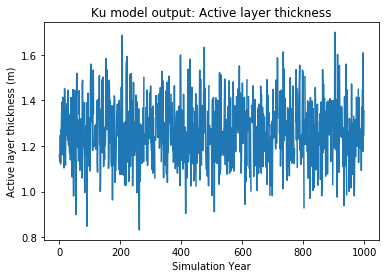

In [26]:
# Take a look at the outputs!
plt.plot(alt)
plt.xlabel('Simulation Year')
plt.ylabel('Active layer thickness (m)')
plt.title('Ku model output: Active layer thickness')
plt.show()

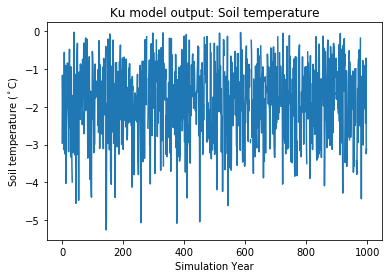

In [27]:
# Take a look at the outputs!
plt.plot(tps)
plt.xlabel('Simulation Year')
plt.ylabel('Soil temperature ($^\circ$C)')
plt.title('Ku model output: Soil temperature')
plt.show()